# Multi-Frequency Sinusoidal Signals Dataset

This synthetic dataset is generated using sinusoidal signals with multiple frequencies, accompanied by an additional noise component. Each sample in the dataset is a timeseries with a variable length. The dataset includes an identifier for each sample, a set of continuous observations for each timestep, an additional noise field, and a corresponding frequency label for each timestep.

## Dataset Generation Process

1. **Sinusoidal Signal Parameters**:
   - **Number of Frequencies (num_frequencies)**: The dataset includes a specified number of different frequencies.
   - **Frequency Range (min_freq, max_freq)**: Frequencies are evenly spaced within this range.
   - **Noise Level**: Gaussian noise is added to the signal to simulate real-world conditions.

2. **Segment Length**:
   - **Variable Segment Lengths**: Each segment within a sample has a length randomly chosen between specified minimum and maximum values.

3. **Observation Generation**:
   - **Total Length**: Each sample's total length is randomly chosen between specified minimum and maximum values.
   - **Segment Generation**: For each segment within a sample, a frequency is randomly chosen, and the corresponding sinusoidal signal is generated with added Gaussian noise.
   - **Noise Field**: An additional pure noise field is generated for each segment to add complexity.

## Dataset Structure

- **Sample ID**: A unique identifier for each sample.
- **Time Step**: The time step within the sample.
- **Observations**: The sinusoidal signal with added noise.
- **Noise**: The additional noise field.
- **Labels**: The frequency used to generate the signal at each timestep.


## Summary

The Multi-Frequency Sinusoidal Signals Dataset is a valuable for time step classification algorithms, where the goal is to accurately classify each timestep within the sequences based on the underlying frequency of the sinusoidal signal. The variable length of the samples and the additional noise field add complexity, making it an excellent dataset for testing and benchmarking advanced timeseries analysis techniques.

In [44]:
import os
import numpy as np
import pandas as pd

In [45]:
dataset_name = "multi_frequency_sinusoidal"
test_size = 0.2

In [46]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
train_outp_fname = os.path.join(output_dir, f'{dataset_name}_train.csv')
test_outp_fname = os.path.join(output_dir, f'{dataset_name}_test.csv')
test_key_outp_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')

# Generate Data

In [47]:
def generate_multiclass_sinusoidal_data_with_noise(num_samples: int, min_len: int, max_len: int, num_frequencies: int, min_freq: float, max_freq: float, noise_level: float = 0.1, min_segment_len: int = 10, max_segment_len: int = 30, random_state: int = None):
    """
    Generate multi-class multi-frequency sinusoidal signals dataset with an additional noise field.

    Args:
        num_samples (int): Number of samples to generate.
        min_len (int): Minimum length of each sample.
        max_len (int): Maximum length of each sample.
        num_frequencies (int): Number of different frequencies (classes).
        min_freq (float): Minimum frequency value.
        max_freq (float): Maximum frequency value.
        noise_level (float): Standard deviation of Gaussian noise added to the signal.
        min_segment_len (int): Minimum length of each segment within a sample.
        max_segment_len (int): Maximum length of each segment within a sample.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Generated dataset with columns for sample_id, time_step, observation, noise, and label.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    data = []
    
    frequencies = np.linspace(min_freq, max_freq, num_frequencies)
    
    for sample_id in range(num_samples):
        total_length = np.random.randint(min_len, max_len + 1)
        
        current_length = 0
        while current_length < total_length:
            segment_len = np.random.randint(min_segment_len, max_segment_len + 1)
            segment_len = min(segment_len, total_length - current_length)  # Ensure it doesn't exceed total_length
            
            freq = np.random.choice(frequencies)
            segment_time = np.linspace(0, 1, segment_len)
            segment_signal = np.sin(2 * np.pi * freq * segment_time) + np.random.normal(0, noise_level, segment_len)
            noise_signal = np.random.normal(0, 1, segment_len)  # Additional pure std normal noise field
            
            for t in range(segment_len):
                data.append({
                    'sample_id': sample_id,
                    'time_step': current_length + t,
                    'observation': segment_signal[t],
                    'noise': noise_signal[t],
                    'label': freq
                })
            
            current_length += segment_len
    
    df = pd.DataFrame(data)
    return df

In [39]:
num_samples = 100
min_len = 100
max_len = 500
num_frequencies = 5
min_freq = 0.5
max_freq = 2.5
noise_level = 0.05
min_segment_len = 20
max_segment_len = 50
random_state = 42

data = generate_multiclass_sinusoidal_data_with_noise(
    num_samples,
    min_len,
    max_len,
    num_frequencies,
    min_freq,
    max_freq,
    noise_level,
    min_segment_len,
    max_segment_len,
    random_state
)
print(data.head())

   sample_id  time_step  observation     noise  label
0          0          0     0.027187  1.524242    2.5
1          0          1     0.370924  0.323000    2.5
2          0          2     0.675834 -1.393417    2.5
3          0          3     1.052900 -2.178334    2.5
4          0          4     0.991853 -1.043896    2.5


In [51]:
data.shape

(29700, 5)

# Visualize Samples

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_sample(data: pd.DataFrame, sample_id: int):
    """
    Plot the observation values for a specific sample, color-coded by label.

    Args:
        data (pd.DataFrame): The dataset containing sample_id, time_step, observation, noise, and label.
        sample_id (int): The ID of the sample to plot.
    """
    sample_data = data[data['sample_id'] == sample_id]
    
    # Normalize the labels for the colormap
    unique_labels = sample_data['label'].unique()
    norm = mcolors.Normalize(vmin=unique_labels.min(), vmax=unique_labels.max())
    
    plt.figure(figsize=(14, 4))
    scatter = plt.scatter(
        sample_data['time_step'],
        sample_data['observation'],
        c=sample_data['label'], cmap='viridis', norm=norm)
    cbar = plt.colorbar(scatter, label='Frequency (Hz)')
    cbar.set_ticks(unique_labels)
    cbar.set_ticklabels([f'{label:.2f}' for label in unique_labels])
    
    plt.title(f'Sample {sample_id} - Observation vs. Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Observation')
    plt.grid(True)
    plt.show()




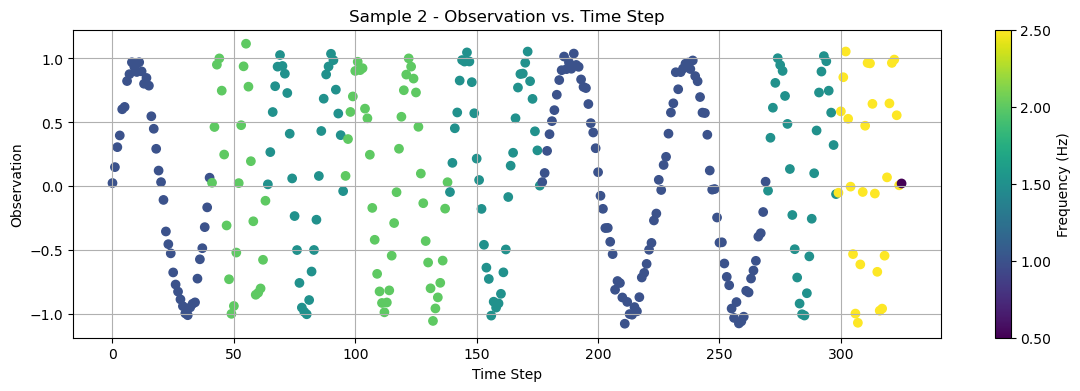

In [43]:

plot_sample(data, sample_id=2)

# Save Main Data File

In [48]:
os.makedirs(output_dir, exist_ok=True)

data.to_csv(outp_fname, index=False, float_format="%.4f")

# Train/Test Split

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def split_by_sample_id(data: pd.DataFrame, test_size: float, random_state: int = None):
    """
    Split the data into train and test sets by sample_id.

    Args:
        data (pd.DataFrame): The dataset containing sample_id, label, and observation dimensions.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        train_df (pd.DataFrame): The training data.
        test_df (pd.DataFrame): The testing data.
        test_keys (pd.DataFrame): The testing keys containing sample_id and label.
    """
    # Get unique sample IDs
    unique_ids = data['sample_id'].unique()

    # Split the sample IDs into train and test sets
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=random_state)

    # Initialize lists for storing the split data
    train_data, test_data, test_keys = [], [], []

    # Group the data by sample_id
    grouped = data.groupby('sample_id')

    # Assign each group to either train or test based on the split
    for sample_id, group in grouped:
        if sample_id in train_ids:
            train_data.append(group)
        else:
            test_key = group[['sample_id', 'time_step', 'label']].reset_index(drop=True)
            test_df = group.drop(columns=['label']).reset_index(drop=True)
            test_data.append(test_df)
            test_keys.append(test_key)

    # Concatenate the data into final DataFrames
    train_df = pd.concat(train_data).reset_index(drop=True)
    test_df = pd.concat(test_data).reset_index(drop=True)
    test_keys = pd.concat(test_keys).reset_index(drop=True)

    return train_df, test_df, test_keys


train_df, test_df, test_keys = split_by_sample_id(data, test_size=test_size, random_state=42)

print(data.shape, train_df.shape, test_df.shape, test_keys.shape)

(29700, 5) (24250, 5) (5450, 4) (5450, 3)


In [52]:
train_df.to_csv(train_outp_fname, index=False, float_format="%.4f")
test_df.to_csv(test_outp_fname, index=False, float_format="%.4f")
test_keys.to_csv(test_key_outp_fname, index=False, float_format="%.4f")